## ⚡ Semiconductor Test Result Prediction

Given *data about semiconductors*, let's try to predict whether a given semiconductor will **pass** or **fail** a QA test.

We will use a logistic regression model to make our predictions.

Data source: https://www.kaggle.com/datasets/paresh2047/uci-semcom

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data = pd.read_csv('archive/uci-secom.csv')
data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


### Preprocessing

In [5]:
df = data.copy()

In [6]:
df

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [7]:
# Drop Time
df = df.drop('Time', axis=1)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [14]:
# Drop columns with more than 25% missing values
missing_value_columns = df.columns[df.isna().mean() > 0.25]
df = df.drop(missing_value_columns, axis=1)

In [15]:
df

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [16]:
df.isna().mean() > 0.25

0            False
1            False
2            False
3            False
4            False
             ...  
586          False
587          False
588          False
589          False
Pass/Fail    False
Length: 559, dtype: bool

In [18]:
df['Pass/Fail'].isna().sum()

np.int64(0)

In [19]:
# Fill remaining missing values
for column in df.columns:
    df[column] = df[column].fillna(df[column].mean())

In [21]:
df.isna().sum().sum()

np.int64(0)

In [22]:
# Give text labels to training examples
df['Pass/Fail'] = df['Pass/Fail'].replace({-1: 'PASS', 1: 'FAIL'})

In [43]:
single_valued_columns = pd.Series({column: len(df[column].unique()) for column in df.columns})
single_valued_columns = single_valued_columns[single_valued_columns == 1].index
single_valued_columns

Index(['5', '13', '42', '49', '52', '69', '97', '141', '149', '178',
       ...
       '529', '530', '531', '532', '533', '534', '535', '536', '537', '538'],
      dtype='object', length=116)

In [44]:
# Drop columns with single values
df = df.drop(single_valued_columns, axis=1)
df

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.500500,0.016200,-0.003400,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,PASS
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.496600,-0.000500,-0.014800,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,PASS
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.443600,0.004100,0.001300,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,FAIL
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.488200,-0.012400,-0.003300,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,PASS
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.503100,-0.003100,-0.007200,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,PASS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.342400,-0.004500,-0.005700,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,PASS
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.433300,-0.006100,-0.009300,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,PASS
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.462862,-0.000841,0.000146,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,PASS
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.462200,-0.007200,0.003200,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,PASS


In [45]:
# Split df into X and y
y = df['Pass/Fail'].copy()
X = df.drop('Pass/Fail', axis=1).copy()

In [46]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [47]:
X_train

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
390,2989.82,2434.00,2180.0556,1031.0669,0.7565,104.7056,0.1226,1.5865,0.0080,-0.0216,...,1.5654,15.3151,0.4952,0.0136,0.0041,2.7510,0.0104,0.0083,0.0024,79.8045
635,3017.53,2524.09,2201.0667,880.2317,1.4148,106.5478,0.1211,1.3720,-0.0005,0.0052,...,1.4452,17.2719,0.4998,0.0097,0.0026,1.9495,0.0328,0.0235,0.0068,71.5333
78,3032.89,2500.81,2183.4333,1582.5646,1.3601,99.0267,0.1240,1.4615,-0.0034,-0.0042,...,1.9009,17.0931,0.4961,0.0124,0.0036,2.4896,0.0155,0.0177,0.0055,114.4127
733,3037.92,2361.50,2210.9778,1572.4698,1.0204,106.2089,0.1222,1.5251,0.0468,-0.0010,...,1.8145,12.5432,0.4965,0.0186,0.0042,3.7541,0.0335,0.0084,0.0030,25.1494
1262,2982.67,2541.55,2173.4889,1145.7970,0.9402,104.0556,0.1247,1.3762,-0.0206,-0.0104,...,2.1201,13.5037,0.4949,0.0146,0.0033,2.9448,0.0137,0.0326,0.0108,237.4625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3070.07,2459.22,2216.5111,871.2526,1.2366,107.4867,0.1194,1.4125,-0.0199,0.0024,...,1.7311,8.5390,0.4963,0.0153,0.0037,3.0867,0.0072,0.0210,0.0065,291.8040
905,2948.57,2526.19,2216.5000,1111.5436,0.8373,99.9867,0.1205,1.4684,0.0013,0.0044,...,1.8232,8.6457,0.5048,0.0118,0.0029,2.3445,0.0211,0.0115,0.0036,54.4761
1096,3062.78,2491.31,2266.8333,2040.1937,1.6558,94.8489,0.1216,1.3909,0.0053,-0.0055,...,1.7710,14.1291,0.5021,0.0111,0.0034,2.2065,0.0179,0.0079,0.0024,44.1194
235,3045.71,2490.25,2197.6444,1247.0334,0.7865,99.9211,0.1203,1.4257,-0.0343,-0.0016,...,0.9477,9.2608,0.4947,0.0121,0.0038,2.4419,-0.0034,0.0093,0.0030,272.3477


In [48]:
y_train

390     PASS
635     PASS
78      PASS
733     PASS
1262    PASS
        ... 
715     PASS
905     PASS
1096    PASS
235     FAIL
1061    PASS
Name: Pass/Fail, Length: 1096, dtype: object

In [49]:
# Scale X
scaler = StandardScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [50]:
X_train

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
390,-0.349832,-0.784979,-0.702110,-0.837070,-0.062886,0.550891,0.079727,1.660382,0.575205,-2.431983,...,-0.229337,-0.101179,-1.421245,-0.104493,0.090875,-0.091661,-0.896661,-0.895327,-0.972313,-0.222332
635,0.033698,0.353357,0.015921,-1.183386,-0.051551,0.845131,-0.117085,-1.250633,0.022325,0.591865,...,-0.236675,0.059216,-0.063064,-0.367069,-0.378555,-0.351676,0.896361,0.747328,0.485680,-0.307801
78,0.246294,0.059202,-0.586681,0.429161,-0.052493,-0.356155,0.263419,-0.036013,-0.166304,-0.468738,...,-0.208856,0.044560,-1.155514,-0.185286,-0.065602,-0.176462,-0.488429,0.120526,0.054910,0.135286
733,0.315914,-1.701055,0.354622,0.405983,-0.058342,0.791001,0.027244,0.827113,3.098939,-0.107682,...,-0.214130,-0.328386,-1.037412,0.232143,0.122170,0.233756,0.952392,-0.884520,-0.773496,-0.787101
1262,-0.448795,0.573974,-0.926520,-0.573652,-0.059723,0.447072,0.355265,-1.193634,-1.285073,-1.168285,...,-0.195474,-0.249656,-1.509822,-0.037166,-0.159488,-0.028790,-0.632511,1.730761,1.811128,1.406800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.760898,-0.466310,0.543717,-1.204002,-0.054619,0.995094,-0.340139,-0.701000,-1.239541,0.275941,...,-0.219221,-0.656602,-1.096463,0.009963,-0.034307,0.017244,-1.152807,0.477155,0.386272,1.968328
905,-0.920769,0.379892,0.543337,-0.652297,-0.061495,-0.202822,-0.195810,0.057628,0.139406,0.501601,...,-0.213599,-0.647856,1.413220,-0.225682,-0.284669,-0.223534,-0.040173,-0.549505,-0.574678,-0.484059
1096,0.659998,-0.060836,2.263423,1.479871,-0.047401,-1.023442,-0.051481,-0.994138,0.399585,-0.615418,...,-0.216786,-0.198393,0.616026,-0.272811,-0.128193,-0.268303,-0.296319,-0.938555,-0.972313,-0.591078
235,0.423734,-0.074230,-0.101032,-0.341214,-0.062369,-0.213299,-0.222052,-0.521861,-2.176185,-0.175380,...,-0.267046,-0.597438,-1.568874,-0.205484,-0.003011,-0.191936,-2.001291,-0.787258,-0.773496,1.767280


### Examining Class Imbalance

In [51]:
y_train.value_counts()

Pass/Fail
PASS    1024
FAIL      72
Name: count, dtype: int64

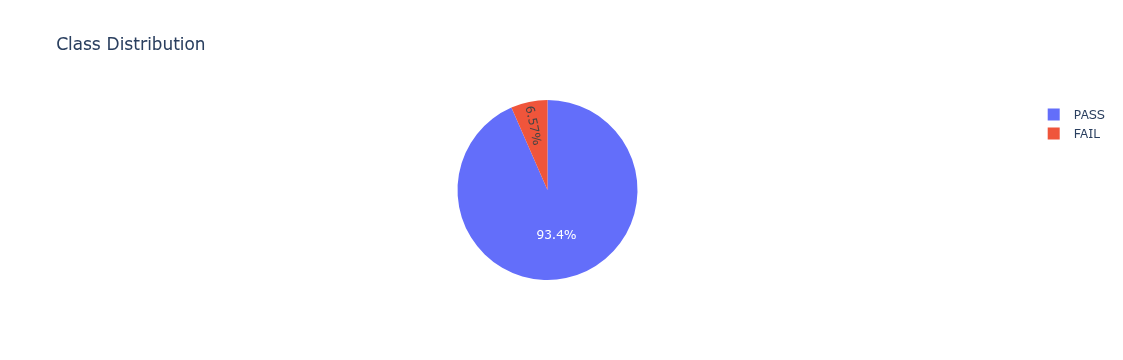

In [53]:
fig = px.pie(
    y_train.value_counts(),
    values = 'count', 
    names=['PASS', 'FAIL'],
    title = 'Class Distribution',
    width = 500
)

fig.show()

### Training a Model (Imbalanced Classes)

In [56]:
def evaluate_model(model, X_test, y_test):
    acc = model.score(X_test, y_test)
    print("Accuracy: {:.2f}%".format(acc*100))
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=['PASS', 'FAIL'])
    clr = classification_report(y_test, y_pred, labels=['PASS', 'FAIL'])

    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=[0.5, 1.5], labels=['PASS', 'FAIL'])
    plt.yticks(ticks=[0.5, 1.5], labels=['PASS', 'FAIL'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report:\n------------------------------------\n", clr)

Accuracy: 88.96%


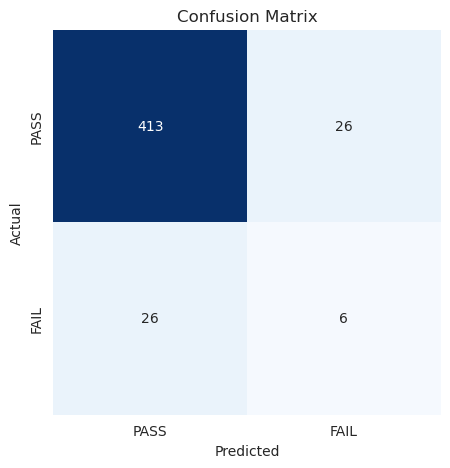

Classification Report:
------------------------------------
               precision    recall  f1-score   support

        PASS       0.94      0.94      0.94       439
        FAIL       0.19      0.19      0.19        32

    accuracy                           0.89       471
   macro avg       0.56      0.56      0.56       471
weighted avg       0.89      0.89      0.89       471



In [57]:
model = LogisticRegression()
model.fit(X_train, y_train)

evaluate_model(model, X_test, y_test)

#### Random OverSampling

In [58]:
oversampler = RandomOverSampler(random_state=1)
X_train_os, y_train_os = oversampler.fit_resample(X_train, y_train)

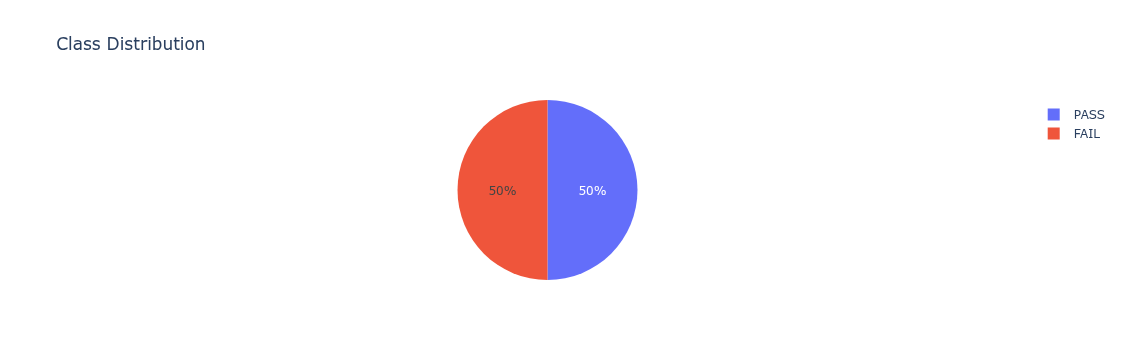

In [60]:
fig = px.pie(
    y_train_os.value_counts(),
    values = 'count', 
    names=['PASS', 'FAIL'],
    title = 'Class Distribution',
    width = 500
)

fig.show()

Accuracy: 86.62%


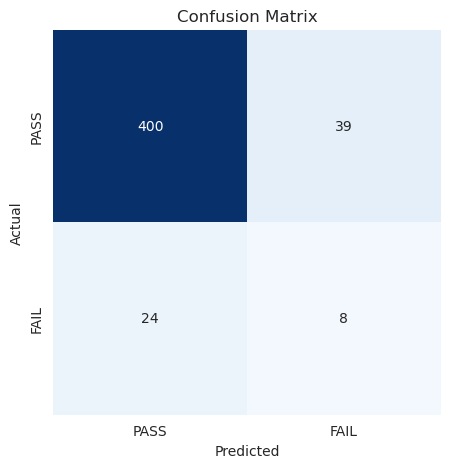

Classification Report:
------------------------------------
               precision    recall  f1-score   support

        PASS       0.94      0.91      0.93       439
        FAIL       0.17      0.25      0.20        32

    accuracy                           0.87       471
   macro avg       0.56      0.58      0.56       471
weighted avg       0.89      0.87      0.88       471



In [62]:
model_os = LogisticRegression()
model_os.fit(X_train_os, y_train_os)

evaluate_model(model_os, X_test, y_test)

#### Oversampling with SMOTE

In [63]:
oversampler = SMOTE(random_state=1)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)

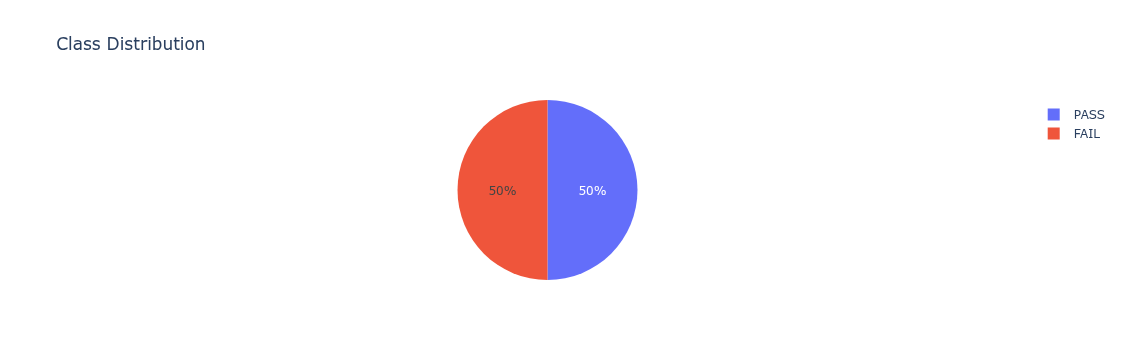

In [64]:
fig = px.pie(
    y_train_smote.value_counts(),
    values = 'count', 
    names=['PASS', 'FAIL'],
    title = 'Class Distribution',
    width = 500
)

fig.show()

In [65]:
y_train_smote.value_counts()

Pass/Fail
PASS    1024
FAIL    1024
Name: count, dtype: int64

Accuracy: 85.99%


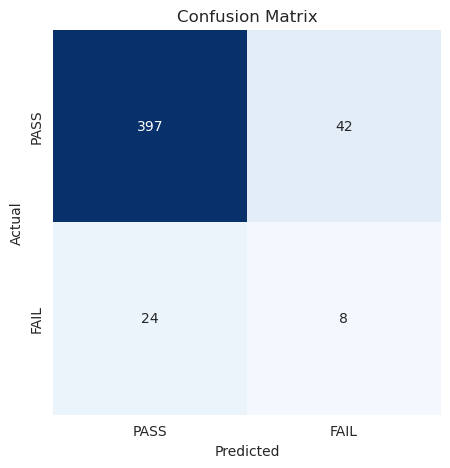

Classification Report:
------------------------------------
               precision    recall  f1-score   support

        PASS       0.94      0.90      0.92       439
        FAIL       0.16      0.25      0.20        32

    accuracy                           0.86       471
   macro avg       0.55      0.58      0.56       471
weighted avg       0.89      0.86      0.87       471



In [66]:
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

evaluate_model(model_smote, X_test, y_test)